<a href="https://colab.research.google.com/github/felipemaiapolo/monte_carlo/blob/main/Intro_MonteCarlo_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Simulação de Monte Carlo em Python

**Autor:** Felipe Maia Polo - Co-fundador e ex-presidente do Neuron - Data science and Artificial Intelligence, economista pela USP e mestrando em Estatística pela mesma instituição. Research assistant no Advanced Institute for Artificial Intelligence (AI2). Apaixonado por Matemática, Estatística e Data Science.

**Contato:** felipemaiapolo@gmail.com - https://www.linkedin.com/in/felipemaiapolo/

**Feedback:** https://forms.gle/U6yBVSYwxNRWaE15A

**Sugestões de conteúdo**

1. **Simulação de Monte Carlo:** http://www.portalaction.com.br/simulacao-monte-carlo
2. **Simulação de Monte Carlo para Inferência Bayesiana:** Gamerman, D., & Lopes, H. F. (2006). Markov chain Monte Carlo: stochastic simulation for Bayesian inference. CRC Press.
3. **Simulação de Monte Carlo:** https://www.youtube.com/watch?v=OgO1gpXSUzU
4. **Simulação de Monte Carlo:** https://www.youtube.com/watch?v=ioVccVC_Smg




## Índice

1. O que é simulação de Monte Carlo?
2. Revisão da Teoria da Probabilidade;
3. Geração de variáveis aleatórias;
4. Aplicações.

## O que é simulação de Monte Carlo?



Um método para estimar o valor de um quantidade desconhecida usando os princípios da inferência estatística (e um computador).

### Uma breve história

Décadas de 30/40 :

- Ulam e a Solitária;
- John von Neumann e ENIAC;
- Bombas nucleares;
- Por que "Monte Carlo"?

## Breve revisão da Teoria da Probabilidade



### Variáveis aleatórias discretas

#### Distribuição uniforme

Todas os valores possíveis para uma variável aleatória $X$ têm a mesma probabilidade. Se uma variável $X$ tem distribuição uniforme discreta, escrevemos assim $X \sim U\{x_1,...,x_n\}$.

Logo se $X \sim U\{x_1,...,x_n\}$ então a função massa de probabilidade de X é dada por

\begin{align}
  \mathbb{P}(X=x)=\frac{1}{n}\mathbb{I}_{\{x_1,...,x_n\}}(x)
\end{align}

Sendo que $\mathbb{I}$ é a função indicadora, ou seja,

\begin{align}
  \mathbb{I}_A(x)=\left\{\begin{matrix}
  1, \text{ se } x \in A\\ 
  0, \text{ se } x \notin A
  \end{matrix}\right.
\end{align}

Vamos programar? 

Abrindo as bibliotecas necessárias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import beta
import seaborn as sns

Supondo que $X$ é a face obtido no lançamento de um dado não viciado, então $X \sim U\{1,...,6\}$. Vamos plotar sua função massa de probabilidade:

In [2]:
def unif_disc(x,lista):
    n=len(lista)
    if x in lista: return 1/n
    else: return 0

In [3]:
lista=[1,2,3,4,5,6]
prob=[]

for i in range(10):
    prob.append([i,unif_disc(i,lista)])
  
d=np.array(prob)
d=pd.DataFrame(d)

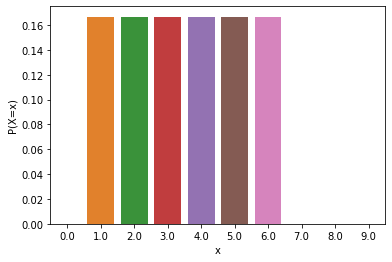

In [4]:
plot=sns.barplot(x=0,y=1,data=d)
plot.set(ylabel="P(X=x)")
plot.set(xlabel="x")
plt.show()

#### Distribuição de Bernoulli 


A distribuição de Bernoulli é usada para modelar situações em que há duas opções, fracasso e sucesso, sendo que o fracasso é denotado por 0 e o sucesso é denotado por 1. Dizemos que a probabilidade de sucesso é $\mathbb{P}(X=1)=p$ e que a probabilidade de fracasso é $\mathbb{P}(X=0)=1-p$. Suponha que a probabilidade de se ganhar na loteria em um jogo é $1/1000000=0,0000001$, então podemos definir $p=0,0000001$ como a probabilidade de sucesso. Se a variável $X$ tem distribuição de Bernoulli com parâmetro $p$, escrevemos $X \sim \text{Ber}(p)$, sendo que uma maneira enxuta de expressar sua função massa de probabilidade é

\begin{align}
  \mathbb{P}(X=x)=p^x(1-p)^{1-x}~\mathbb{I}_{\{0,1\}}(x)
\end{align}



#### Distribuição Binomial

Essa distribuição é dada pela soma de $n$ variáveis independentes com distribuição de Bernoulli. Ao invés de eu me perguntar qual a probabilidade de ganhar na loteria em uma tentativa, me pergunto qual a probabilidade de ganhar $x$ vezes em $n$ tentativas indepependentes (ganhar ou perder em uma tentativa não influencia em nada na probabilidade de ganhar ou perder em outra tentativa). Se uma variável $X$ tem distribuição binomial com parâmetros $n$ (número de tantativas) e $p$ (probabilidade de sucesso em uma tentativa), escrevemos $X \sim \text{Bin}(n,p)$. Usamos a seguinte fórmula para o cálculo:

\begin{align}
	\mathbb{P}(X=x)&=\binom{n }{k}p^x(1-p)^{n-x}~\mathbb{I}_{\{0,...n\}}(x)\\
  &=\frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}~\mathbb{I}_{\{0,...n\}}(x)
\end{align}


Codando a função de probabilidade:

In [5]:
import math
def binomial(x,n,p):
    factorial=(math.factorial(n)/(math.factorial(x)*math.factorial(n-x)))
    return  factorial*(p)**x*(1-p)**(n-x)

Tomando $n=20$ e $p=0.15$:

In [6]:
prob=[]
n=20
p=0.15

from  matplotlib.ticker import FuncFormatter

for i in range(n+1):
    prob.append([i,binomial(i,n,p)])
  
d=np.array(prob)
d=pd.DataFrame(d)

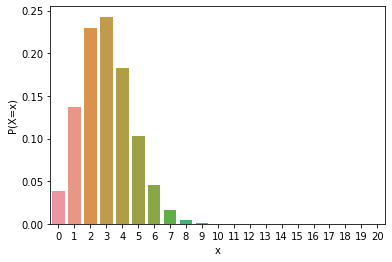

In [7]:
plot=sns.barplot(x=0,y=1,data=d)
plot.set(ylabel="P(X=x)")
plot.set(xlabel="x")
plot.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

### Variáveis aleatórias contínuas

#### Distribuição Uniforme

Analogamente à distribuição uniforme discreta, a uniforme contínua tem que cada intervalo de mesmo tamanho deve ter a mesma probabilidade de ocorrer. Se $X$ tem distribuição uniforme entre os limites $a$ e $b$, então escrevemos $X \sim U[a,b]$ e sua função densidade é escrita como:

\begin{equation}
	p(x)=\frac{1}{b-a}~\mathbb{I}_{[a,b]}(x)
\end{equation}

Vamos então ver o gráfico da densidade da uniforme:

In [8]:
#definindo função densidade
def unif_cont(x,a,b):
    if x>=a and x<=b: return 1/(b-a)
    else: return 0

In [9]:
dens=[]
a=0
b=1

x = np.arange(-.5, 1.5, 0.001)

for i in x:
    dens.append(unif_cont(i,a,b))

d=np.array(dens)

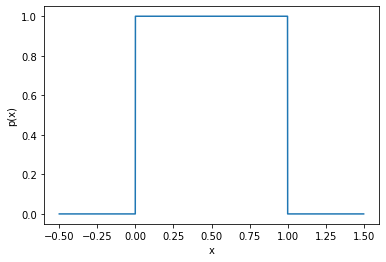

In [10]:
plot=plt.plot(x,d)
plt.ylabel("p(x)")
plt.xlabel("x")
plt.show()

#### Distribuição Normal

Uma distribuição contínua muito importante e muito conhecida é a distribuição Normal. Ela é uma das mais incríveis e úteis distribuições teóricas que existem e é capaz de aproximar diversos fenômenos da natureza. Ela é conhecida por ser simétrica e ter densidade no formato de um sino. A função densidade da normal também pode ser chamada por curva gaussiana, em homenagem ao metemático Gauss. Se uma variável $X$ tem distribuição normal com média $\mu$ e variância $\sigma ^2$ (que é uma medida de quão dispersos serão seus valores aleatórios), podemos escrever $X \sim \text{N}(\mu,\sigma ^2)$. Se  $Z \sim \text{N}(0,1)$, dizemos que $Z$ é distribuída conforme uma Normal Padrão. A função densidade da normal tem a fórmula:

\begin{equation}
	p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}~\mathbb{I}_{\mathbb{R}}(x)
\end{equation}

Definindo função de densidade:

In [11]:
#definindo função densidade
def normal(x,mu,sigma):
    frac=1/np.sqrt(2*np.pi*sigma**2)
    return frac*np.e**(-.5*((x-mu)/sigma)**2)

Tomando $\mu=0$ e $\sigma=1$:

In [12]:
dens=[]
mu=0
sigma=1

x = np.arange(-4, 4, 0.001)

for i in x:
    dens.append(normal(i,mu,sigma))

d=np.array(dens)

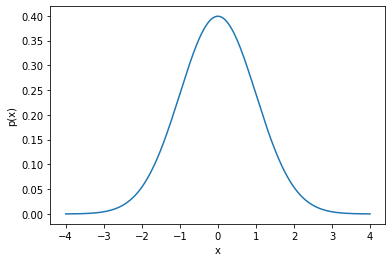

In [13]:
plot=plt.plot(x,d)
plt.ylabel("p(x)")
plt.xlabel("x")
plt.show()

#### Distribuição Exponencial

Uma distribuição contínua muito importante e muito conhecida é a distribuição Exponencial. Se uma variável $X$ tem distribuição Exponencial com média $\beta$, podemos escrever $X \sim \text{Exp}(\beta)$. A função densidade da exponencial tem a fórmula:

\begin{equation}
	p(x)=\frac{1}{\beta}e^{-x/\beta}~\mathbb{I}_{\mathbb{[0,\infty)}}(x)
\end{equation}

Definindo função de densidade:

In [14]:
#definindo função densidade
def exp(x, beta):
    return (1/beta)*np.exp(-x/beta)

Tomando $\beta=1/2$:

In [15]:
dens=[]
beta=.5

x = np.arange(0, 4, 0.001)

for i in x:
    dens.append(exp(i, beta))

d=np.array(dens)

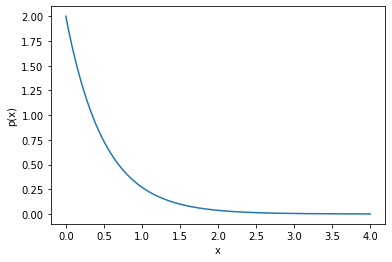

In [16]:
plot=plt.plot(x,d)
plt.ylabel("p(x)")
plt.xlabel("x")
plt.show()

### Cálculo de probabilidades

#### Variáveis aleatórias discretas

Se $X$ é uma variável aleatória que assume valores no conjunto $\mathcal{X} \subset \mathbb{R}$ e que tem distribuição $\mathbb{P}$, então temos que a probabilidade de $X$ estar em um subconjunto $A$ de $\mathcal{X}$ é dada por

\begin{align}
\mathbb{P}(X \in A) &= \sum_{x \in A} \mathbb{P}(X = x)
\end{align}

Logo,

\begin{align}
\mathbb{P}(X \in \mathcal{X}) &= 1
\end{align}

#### Variáveis aleatórias contínuas

Se $X$ é uma variável aleatória que assume valores no conjunto $\mathcal{X} \subseteq \mathbb{R}$ e que tem função densidade de probabilidade $p$, então temos que a probabilidade de $X$ estar em um subconjunto $A$ de $\mathcal{X}$ é dada por

\begin{align}
\mathbb{P}(X \in A) = \int_A p(x) \text{d}x
\end{align}

Logo,

\begin{align}
\mathbb{P}(X \in \mathcal{X}) = 1
\end{align}

### Esperança matemática

#### Variáveis aleatórias discretas

Se $X$ é uma variável aleatória que assume valores no conjunto $\mathcal{X} \subset \mathbb{R}$ e que tem distribuição $\mathbb{P}$, então temos que a esperança de $X$ (se existir) é dada por

\begin{align}
\mathbb{E}(X) &= \sum_{x \in \mathcal{X}} x ~\mathbb{P}(X = x)
\end{align}

#### Variáveis aleatórias contínuas

Se $X$ é uma variável aleatória que assume valores no conjunto $\mathcal{X} \subseteq \mathbb{R}$ e que tem função densidade de probabilidade $p$, então temos que a esperança de $X$ (se existir) é dada por

\begin{align}
\mathbb{E}(X) &= \int_\mathcal{X} x~ p(x) \text{d}x
\end{align}

### Variância

Se $X$ é uma variável aleatória, então sua variância (se existir) é dada por

\begin{align}
\text{Var}(X)&=\mathbb{E}\big[(X-\mathbb{E}(X))^2\big]\\
&=\mathbb{E}(X^2)-\mathbb{E}(X)^2
\end{align}

## Geração de variáveis aleatórias


Um atributo muito legal e importante que o Python tem em suas dependências é a capacidade da geração de números "aleatórios" de acordo com uma distribuição específica. Por exemplo, se quisermos gerar números de acordo com uma distribuição uniforme contínua entre 0 e 1 podemos usar o pacote Numpy de acordo com o mostrado a seguir:

In [17]:
#o primeiro parâmetro é o limite inferior da distribuição, o segundo é o limite superior e o terceiro é o tamanho da amostra
a=0
b=1
N=25
np.random.seed(42) #fixando semente
x=np.random.uniform(a,b,N) 

#Visualizando vetor gerado
print(x)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998]


Podemos visualizar a distribuição desses números gerados aleatóriamente utilizando um gráfico de densidade (+ comum, por se tratar de uma variável com distribuição contínua), um histograma ou os dois juntos:

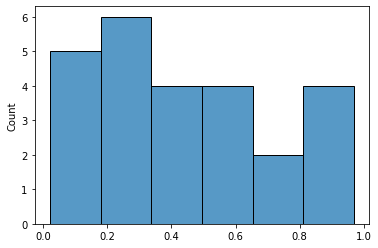

In [18]:
sns.histplot(x)
plt.show()

Apesar de termos gerado uma amostra com distribuição uniforme, o gráfico não parece tão "uniforme" assim, né? Isso porque nossa amostra é muito pequena. Se gerarmos uma amostra com N=1.000.000, por exemplo, o cenário já muda drasticamente:

In [19]:
a=0
b=1
N=1000000
x=np.random.uniform(a,b,N) 

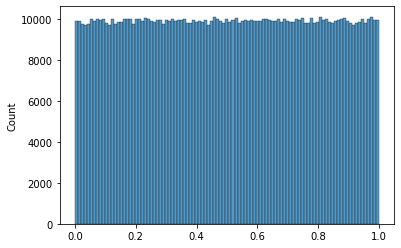

In [20]:
sns.histplot(x)
plt.show()

Se quisermos simular, por exemplo, o lançamento de uma moeda (distribuição Bernoulli), podemos simular uma variável uniforme entre 0 e 1 e se o valor tirado for menor do que 0.5 dizemos que foi cara e se for maior dizemos que foi coroa (ou vice-versa). Mantemos a probabilidade de 50% em cada caso.

Vamos então simular o lançamento de uma moeda:

In [21]:
x=np.random.uniform(0,1,1) 
print("x=",x[0], "\n")

if x<0.5: print("Cara!")
else: print("Coroa!")

x= 0.2553616198227765 

Cara!


## Aplicação: estimando o tempo de um projeto com simulação de Monte Carlo

Suponha que queremos descrever a distribuição de probabilidade de dias que um projeto demorará para ficar pronto. Suponha inicialmente que esse projeto seja composto de uma primeira tarefa que é criar um algoritmo capaz de limpar uma base de dados. Suponha que essa é uma tarefa que levará de 2 a 4 dias, sendo que a probabilidade de a tarefa ficar pronta ao final do 2º dia é 0.2, de ficar pronta ao final do 3º dia é 0.35 e de ficar pronta ao final do 4º dias é 0.45. 

Se $D_1$ é uma quantidade aleatória de dias para se completar a primeira tarefa, temos então que:

1. $\mathbb{P}(D_1=1)=0$
2. $\mathbb{P}(D_1=2)=0.2$
3. $\mathbb{P}(D_1=3)=0.35$
4. $\mathbb{P}(D_1=4)=0.45$

Vamos então simular a variável $D_1$ assim como fizemos com o lançamento da moeda. Podemos aplicar o resultado diretamente com o pacote Numpy, não sendo necessário gerar a uniforme e depois usar condicionais em sequência, podemos usar um gerador de variáveis aleatórias multinomiais (uma generalização de Bernoulli, pois podem haver mais de 2 opções de resultado):

In [22]:
d=[2,3,4] #lista de dias possíveis
prob=[.2,.35,.45] #probabilidades por dias
N=10 #número de lançamentos

np.random.seed(42) #fixando semente
x=np.random.multinomial(N, prob)
x

array([1, 6, 3])

O resultado acima quer dizer que em 10 repetições, uma das vezes demorou-se 1 vez para terminar a tarefa ao final do segundo dia, por exemplo. Vamos agora repetir o experimento com N=100.000:

In [23]:
d=[2,3,4] #lista de dias possíveis
prob=[.2,.35,.45] #probabilidades por dias
N=100000 #número de lançamentos

np.random.seed(42) #fixando semente
x=np.random.multinomial(N, prob)

x

array([19876, 35168, 44956])

Podemos acessar as probabilidades empíricas (proporções) de cada uma das possibilidades dividindo x por N:

In [24]:
x/N

array([0.19876, 0.35168, 0.44956])

Perceba que as probabilidades empíricas são muito próximas àqueles que definimos inicialmente. Esse exemplo não traz nada de muito interessante pois sabemos as probabilidades de antemão de se terminar o projeto de uma tarefa. No entanto, quando começamos a adicionar tarefas em série ou em paralelo, as coisas se tornam complicadas e muitas vezes calcular na "raça" a distribuição de dias para terminar o projeto é inviável. 

Vamos fazer um exemplo para duas tarefas em série. Vamos supor que a primeira tarefa continue sendo a mesma (limpeza da base de dados) com as mesmas probabilidades associadas. Agora temos uma segunda tarefa, que será executada logo após o término da primeira, mas que a quantidade de dias para o término é independente dos dias gastos para a primeira tarefa (uma hipótese simplificadora e realista). Suponha que a segunda tarefa seja gerar resultados estatísticos a partir dos dados tratados e que os dias para seu término, $D_2$, tenham a seguinte distribuição de probabilidade:

1. $\mathbb{P}(D_2=1)=.3$
2. $\mathbb{P}(D_2=2)=.4$
3. $\mathbb{P}(D_2=3)=.3$

Agora que sabemos a distribuição de $D_1$ e $D_2$, queremos saber a distribuição de dias  para o términar do projeto como um todo $D=D_1+D_2$. Vamos então aproximá-la fazendo simulações! Como, a princípio, as tarefas podem ocorrer tanto em série quanto em paralelo, vamos simular dentro de um loop, sendo que cada iteração corresponde a uma execução do projeto como um todo. Em uma iteração qualquer, sortearemos um número aleatório de dias para a conclusão da primeira tarefa, sortearemos um número aleatório de dias para a conclusão da segunda tarefa e depois somaremos os dois números, obtendo o número total daquela iteração:

In [25]:
d1=[2,3,4] #lista de dias possíveis
p1=[.2,.35,.45] #probabilidades por dias

d2=[1,2,3] #lista de dias possíveis
p2=[.3,.4,.3] #probabilidades por dias

d=[]

N=100000 #número de lançamentos
np.random.seed(42) #fixando semente

for i in range(N):
    x1=list(np.random.multinomial(1, p1))
    x2=list(np.random.multinomial(1, p2))
  
    d.append(d1[x1.index(1)] + d2[x2.index(1)])

Os dias para a conclusão do projeto completo foram armazenados na lista "d". Vamos verificar a distribuição de dias! Vamos transformar nossa lista em um dataset do Pandas para conseguir trabalhar com algumas ferramentas deste pacote:

In [26]:
d={'dias':d}
d=pd.DataFrame(d) 

Vamos utilizar uma tabela de frequências para a análise:

In [27]:
pd.crosstab(index=d['dias'], columns="freq")

col_0,freq
dias,
3,6071
4,18515
5,33497
6,28273
7,13644


Agora visualizando as frequências relativas:

In [28]:
d_plot=pd.crosstab(index=d['dias'], columns="freq_rel", normalize=True)
d_plot

col_0,freq_rel
dias,
3,0.06071
4,0.18515
5,0.33497
6,0.28273
7,0.13644


Agora vamos visualizar graficamente a distribuições de dias para a conclusão do projeto:

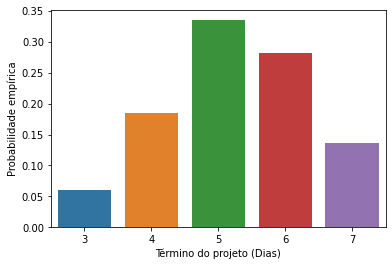

In [29]:
d_plot['dias']=d_plot.index

plot=sns.barplot(x='dias',y='freq_rel',data=d_plot)
plot.set(ylabel="Probabilidade empírica")
plot.set(xlabel="Término do projeto (Dias)")
plt.show()

In [30]:
print("O número médio de dias pra o término do projeto é de:", d['dias'].mean(),"dias.")

O número médio de dias pra o término do projeto é de: 5.24904 dias.


**Sugestão**: Episódio *Hang the DJ* da série Black Mirror.

## Lei (fraca) dos Grandes Números

Seja $X_1,...,X_n$ uma amostra independente e identicamente distribuída conforme uma distribuição $\mathbb{P}$ (discreta ou contínua). Vamos supor que a esperança e variância dessas variáveis são finitas e estão bem definidas. Então se denotarmos a média da amostra como $\bar{X}_n=\frac{1}{n}\sum_{i=1}^n X_i$, temos que

\begin{align}
  \lim_{n \rightarrow \infty} \mathbb{P}(|\bar{X}_n-\mathbb{E}(X)|<\epsilon)=1, ~\forall\epsilon>0
\end{align}

Ou seja, para que a média empírica esteja próxima da esperança (em pelo menos $\epsilon$ unidades) com alta probabilidade, basta que $n$ seja grande o bastante.

### Exemplo

Suponha que podemos geras amostras independentes $X_1,...,X_n$ de $N(\mu,1)$ e que queremos estimar $\mu$ utilizando a média amostral $\bar{X}_n$.

Para esse exemplo vamos supor que $\mu=0$, mas vamos fingir que não sabemos disso. Utilizaremos $n=5000$.

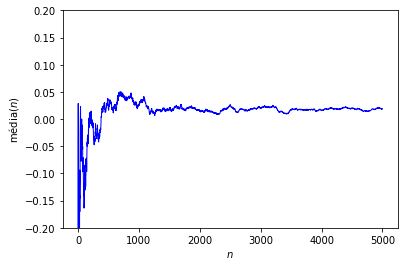

In [31]:
n=5000
mu=0
x=np.array(range(1,n+1))

simulations=[]
B=1

for b in range(B):
  simulations.append(np.random.normal(mu,1,n).tolist())

simulations=np.array(simulations)

simulations=np.cumsum(simulations, axis=1)/(x)

for b in range(B):
  plt.plot(simulations[b,:], 'b', lw=1, alpha=1)

plt.ylim(mu-.2,mu+.2)
plt.xlabel('$n$')
plt.ylabel('média($n$)')
plt.show()

Agora faremos diversas simulações para termos a ideia de convergência estocástica:

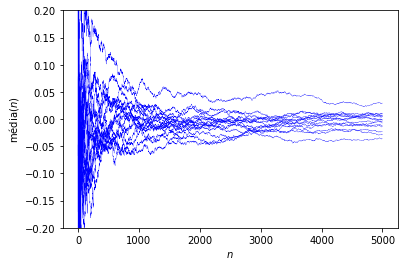

In [32]:
simulations=[]
B=15

for b in range(B):
  simulations.append(np.random.normal(mu,1,n).tolist())

simulations=np.array(simulations)

simulations=np.cumsum(simulations, axis=1)/(x)

for b in range(B):
  plt.plot(simulations[b,:], 'b', lw=.25, alpha=1)

plt.ylim(mu-.2,mu+.2)
plt.xlabel('$n$')
plt.ylabel('média($n$)')
plt.show()

Utilizando a Desigualdade de Chebyshev (https://mathworld.wolfram.com/WeakLawofLargeNumbers.html), vamos desenhar um intervalo de probabilidade $95\%$ entorno de $\mu=0$.

A Desigualdade de Chebyshev diz que, nesse caso específico, temos

\begin{align}
&\mathbb{P}\left(|\bar{X}_n-\mu|<\epsilon\right)\geq 1- \frac{1}{n \epsilon^2}\\[.5em]
&\Rightarrow \mathbb{P}\left(-\epsilon<\bar{X}_n<\epsilon\right)\geq 1- \frac{1}{n \epsilon^2}
\end{align}

Igualando $1- \frac{1}{n \epsilon^2}= 95\%$, obtemos $\epsilon=\sqrt{\frac{20}{n}}$, pois $\epsilon$ deve ser positivo.

Logo temos o seguinte resultado

\begin{align}
\mathbb{P}\left(-\sqrt{\frac{20}{n}}<\bar{X}_n<\sqrt{\frac{20}{n}}\right)\geq 95\%
\end{align}

**Atenção**: na vida real não é como calcular esse intervalo pois não conhecemos $\mu$. No entanto, podemos utilizar intervalos de confiança.


Desenhando

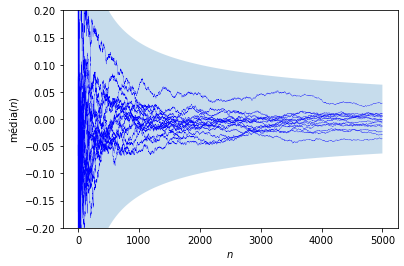

In [33]:
for b in range(B):
  plt.plot(simulations[b,:], 'b', lw=.25, alpha=1)

plt.fill_between(x,np.sqrt(20/x),-np.sqrt(20/x), alpha=.25)
plt.ylim(mu-.2,mu+.2)
plt.xlabel('$n$')
plt.ylabel('média($n$)')
plt.show()

## Aplicação: estimando $\pi$

A ideia para a estimação de $\pi$ é desenhar um círculo inscrito a um quadrado, simular pontos com distribuição uniforme no quadrado e checar a proporção de pontos que caíram dentro do círculo. Veja o desenho abaixo:

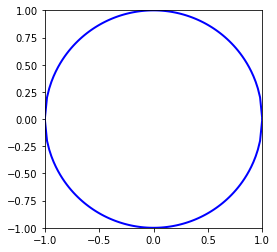

In [34]:
def f(x, sinal=1): return sinal*np.sqrt(1-x**2)

x=np.linspace(-1,1,100)

plt.plot(x, f(x,1), 'b', lw=2)
plt.plot(x, f(x,-1), 'b', lw=2)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Se $X\sim \text{U}[-1,1]^2$, então temos de forma intuitiva:

\begin{align}
  \mathbb{P}(X \in C)&=\frac{\text{Área}(C)}{\text{Área}([-1,1]^2)}=\frac{\pi}{4}
\end{align}

Logo,

\begin{align}
  \pi&=4\cdot \mathbb{P}(X \in C)
\end{align}

Veja também que 

\begin{align}
  &\mathbb{E}[\mathbb{I}_C(X)]=0\cdot\mathbb{P}(X \notin C)+1\cdot \mathbb{P}(X \in C)=\mathbb{P}(X \in C)
\end{align}

Então

\begin{align}
  \pi=4\cdot \mathbb{E}[\mathbb{I}_C(X)]
\end{align}





Se dispomos de uma amostra $X_1,...,X_n$ amostrada de forma independente de $\text{U}[-1,1]^2$, podemos utilizar a Lei dos Grandes Números para obter o seguinte estimador para $\pi$:

\begin{align}
  \hat{\pi}_n&=\frac{4}{n}\sum_{i=1}^n \mathbb{I}_C(X_i)
\end{align}

$\hat{\pi}_n$ é a proporção de pontos aleatórios que caíram dentro do círculo vezes quatro.

Inicialmente simularemos $n=100$ pontos:

In [35]:
n=100
u=np.random.uniform(-1,1,2*n).reshape((n,-1))

u[:5,]

array([[-0.52149507, -0.80331454],
       [-0.37748344,  0.94978082],
       [-0.76076197,  0.37356694],
       [ 0.54297583, -0.54841631],
       [ 0.86105649, -0.32860203]])

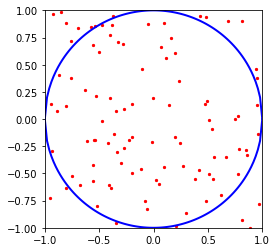

In [36]:
plt.plot(x, f(x,1), 'b', lw=2)
plt.plot(x, f(x,-1), 'b', lw=2)
plt.scatter(u[:,0], u[:,1], color='r', s=5, alpha=1)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Vamos utilizar uma função que verifica se um ponto caiu dentro do círculo:

In [37]:
def in_circle(u): return np.sum(u**2, axis=1)<1

Vamos aplicar essa função nos nossos pontos e plotar novamente

In [38]:
in_out=[in_circle(u), np.logical_not(in_circle(u))]

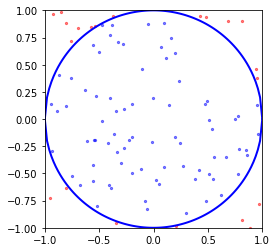

In [39]:
plt.plot(x, f(x,1), 'b', lw=2)
plt.plot(x, f(x,-1), 'b', lw=2)
plt.scatter(u[in_out[0],0], u[in_out[0],1], s=5, color='b', alpha=.5)
plt.scatter(u[in_out[1],0], u[in_out[1],1], s=5, color='r', alpha=.5)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Vamos checar a proporção de pontos de caíram no círculo e retornar a estimativa de $\pi$:

In [40]:
print('estimativa para pi: {}'.format(4*np.mean(in_out[0])))

estimativa para pi: 3.16


Agora vamos aumentar o número de pontos para $n=10000$:

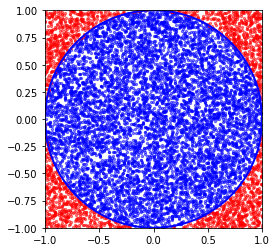

In [41]:
n=10000
u=np.random.uniform(-1,1,2*n).reshape((n,-1))
in_out=[in_circle(u), np.logical_not(in_circle(u))]

plt.plot(x, f(x,1), 'b', lw=2)
plt.plot(x, f(x,-1), 'b', lw=2)
plt.scatter(u[in_out[0],0], u[in_out[0],1], s=5, color='b', alpha=.5)
plt.scatter(u[in_out[1],0], u[in_out[1],1], s=5, color='r', alpha=.5)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [42]:
print('estimativa para pi: {}'.format(4*np.mean(in_out[0])))

estimativa para pi: 3.1488


Assim como fizemos para o exemplo anterior, vamos ver a trajetória das estimativas conforma $n$ cresce:

In [43]:
n=10000
x=np.array(range(n))+1
simulations=[]
B=1

for b in range(B):
  u=np.random.uniform(-1,1,2*n).reshape((n,-1))
  simulations.append(in_circle(u).tolist())

In [44]:
simulations=np.cumsum(simulations, axis=1)/(np.array(range(n))+1)
simulations=4*simulations
simulations.shape

(1, 10000)

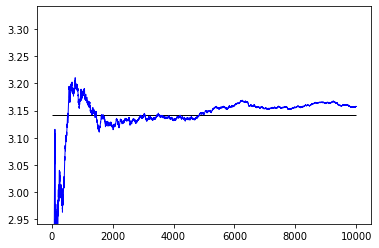

In [45]:
for b in range(B):
  plt.plot(simulations[b,:], 'b', lw=1, alpha=1)

plt.hlines(np.pi, 0, n, lw=1)
plt.ylim(np.pi-.2,np.pi+.2)
plt.show()

Utilizando a Desigualdade de Hoeffding para variáveis aleatórias limitadas (http://www.stat.cmu.edu/~larry/=stat700/Lecture6.pdf), vamos desenhar um intervalo de confiança ($95\%$) entorno das estimativas de $\pi$.

Pela Desigualdade de Hoeffding temos o seguinte

\begin{align}
\mathbb{P}\left(\hat{\pi}_n-\sqrt{\frac{30}{n}}<\pi<\hat{\pi}_n+\sqrt{\frac{30}{n}}\right)\geq 95\%
\end{align}

Desenhando

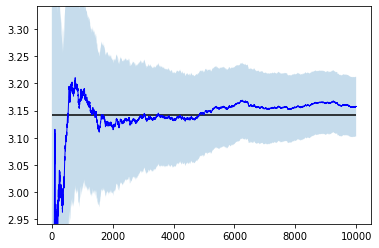

In [46]:
for b in range(B):
  plt.plot(simulations[b,:], 'b', lw=1, alpha=1)
  plt.fill_between(x,simulations[b,:]+np.sqrt((30/x)),simulations[b,:]-np.sqrt((30/x)), alpha=.25)

plt.hlines(np.pi, 0, n, lw=1.5)
plt.ylim(np.pi-.2,np.pi+.2)
plt.show()

**Exercício:** deduzir o resultado acima. 

## Aplicação: cálculo de integrais



Apesar de não dizer explicitamente, na aplicação anterior queríamos estimar uma integral (lembre que as esperanças são integrais!). Agora faremos a estimativa de uma integral de forma mais explícita. Queremos aproximar a seguinte integral se forma numérica:

\begin{align}
I&=\int_{0}^\infty e^{-2y} |\sin(y)|  \text{d} y 
\end{align}

Veja que podemos reescrever a integral acima como uma esperança

\begin{align}
I&=\int_{0}^\infty e^{-2y} |\sin(y)|  dy \\[1.em]
&=0.5\int_{0}^\infty 2 e^{-2y}|\sin(y)|  dy \\[1.em]
&=\mathbb{E}|0.5\sin(Y)|,~Y \sim \exp(0.5)
\end{align}




Se dispomos de uma amostra $X_1,...,X_n$ amostrada de forma independente de $\exp(0.5)$, podemos utilizar a Lei dos Grandes Números para obter o seguinte estimador para $I$:

\begin{align}
  \hat{I}_n&=\frac{1}{n}\sum_{i=1}^n \frac{|\sin(X_i)|}{2}
\end{align}

Assumindo $n=10000$. Vamos ao cálculo:

In [47]:
n=10000
I=.20074
x=np.array(range(n))+1
simulations=[]
B=1

for b in range(B):
  y=np.random.exponential(.5,n)
  simulations.append((.5*np.abs(np.sin(y))).tolist())

simulations=np.array(simulations)
simulations=np.cumsum(simulations, axis=1)/(x)

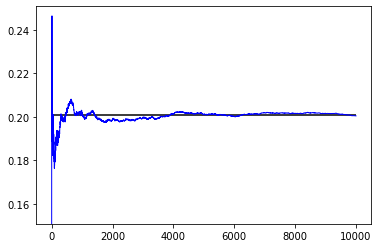

In [48]:
for b in range(B):
  plt.plot(simulations[b,:], 'b', lw=1, alpha=1)

plt.ylim(I-.05,I+.05)
plt.hlines(I, 0, n, lw=1.5)
plt.show()

Veja que $0\leq\frac{|\sin(X_i)|}{2}\leq \frac{1}{2}$, ou seja, é uma variável aleatória limitada. Assim sendo, utilizaremos a Desigualdade de Hoeffding para variáveis aleatórias limitadas (http://www.stat.cmu.edu/~larry/=stat700/Lecture6.pdf), vamos desenhar um intervalo de confiança ($95\%$) entorno das estimativas de $I$.

Pela Desigualdade de Hoeffding temos o seguinte

\begin{align}
\mathbb{P}\left(\hat{I}_n-\frac{1}{\sqrt{2n}}<I<\hat{I}_n+\frac{1}{\sqrt{2n}}\right)\geq 95\%
\end{align}

Desenhando

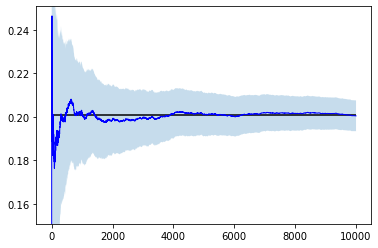

In [49]:
for b in range(B):
  plt.plot(simulations[b,:], 'b', lw=1, alpha=1)
  plt.fill_between(x,simulations[b,:]+np.sqrt((.5/x)),simulations[b,:]-np.sqrt((.5/x)), alpha=.25)

plt.ylim(I-.05,I+.05)
plt.hlines(I, 0, n, lw=1.5)
plt.show()

**Exercício**: reproduzir o resultado acima.